In [1]:

#LAB 01
#DHARMASENA T.A.P
#2018/E/028
#SEMESTER 6
#1 JUN 2022


In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [3]:
adult_dataset = pd.read_csv("adult.data")
print(adult_dataset)

FileNotFoundError: [Errno 2] No such file or directory: 'adult.data'

In [ ]:
adult_dataset.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [ ]:
adult_dataset.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
adult_dataset_features = list(adult_dataset.columns)
print(adult_dataset_features)

['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0', ' 40', ' United-States', ' <=50K']


In [ ]:
import re
with open('adult.names') as fp:
    cols = []
    for line in fp:
        sre = re.match(r'(?P<colname>[a-z\-]+):.*\.', line)
        if sre:
            cols.append(sre.group('colname'))
    cols.append('label')
cols

adult_dataset.columns = cols
adult_dataset_features = list(adult_dataset.columns)
print(adult_dataset_features)


['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']


In [ ]:
print((adult_dataset[['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']]== 0).sum())

#'capital-gain' and 'capital-loss' can be zero so these values kept without changing

age                   0
workclass             0
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation            0
relationship          0
race                  0
sex                   0
capital-gain      29849
capital-loss      31041
hours-per-week        0
native-country        0
label                 0
dtype: int64


In [ ]:
print((adult_dataset[['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']]== ' ?').sum())

#'capital-gain' and 'capital-loss' can be zero so these values kept without changing

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
label                0
dtype: int64


In [ ]:
adult_dataset[['workclass','occupation','native-country']] = adult_dataset[['workclass','occupation','native-country']].replace(' ?', np.nan)

In [ ]:
adult_dataset.fillna(adult_dataset.mode(), inplace=True)

In [ ]:
adult_dataset[['label']] = adult_dataset[['label']].replace(' <=50K', 0)
adult_dataset[['label']] = adult_dataset[['label']].replace(' >50K', 1)

In [ ]:
adult_dataset = adult_dataset.drop_duplicates()
print(adult_dataset)

       age          workclass  fnlwgt    education  education-num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divor

In [ ]:
labelEncoder = LabelEncoder()
dataTransform = adult_dataset.copy()

In [ ]:
for data in adult_dataset.columns:
    dataTransform[data] = labelEncoder.fit_transform(adult_dataset[data])

In [ ]:
X = dataTransform.drop(["label"], axis =1);

In [ ]:
Y = dataTransform["label"]

In [ ]:
X = pd.get_dummies(X, drop_first = True)

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=41)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

Y_pred = model.fit(X_train, Y_train).predict(X_test)

In [ ]:
accuracy = sm.accuracy_score(Y_test, Y_pred)
precision = sm.precision_score(Y_test, Y_pred)
recall = sm.recall_score(Y_test, Y_pred)
print("Accuracy(%) = ", accuracy*100)
print("Precision (%) = ",precision *100)
print("Recall (%) = ",recall*100)

Accuracy(%) =  82.23724646588813
Precision (%) =  68.76763875823141
Recall (%) =  47.0096463022508


Text(83.40000000000006, 0.5, 'predicted class axis')

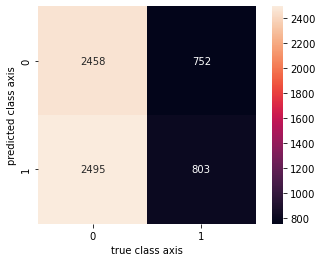

In [ ]:
get_ipython().run_line_magic("matplotlib", "inline")
import matplotlib.pyplot as pt
confusion_m = confusion_matrix(Y_test, Y_pred)
sb.heatmap(confusion_m.T, square=True, annot=True, fmt='d', cbar ='False')
pt.xlabel("true class axis")
pt.ylabel("predicted class axis")

In [ ]:
from sklearn.neighbors import NearestCentroid
Dtomean = NearestCentroid()
Y_pred = Dtomean.fit(X_train, Y_train).predict(X_test)

In [ ]:
accuracy = sm.accuracy_score(Y_test, Y_pred)
precision = sm.precision_score(Y_test, Y_pred)
recall = sm.recall_score(Y_test, Y_pred)
print("Accuracy(%) = ", accuracy*100)
print("Precision (%) = ",precision *100)
print("Recall (%) = ",recall*100)

Accuracy(%) =  50.107559926244626
Precision (%) =  24.348089751364462
Recall (%) =  51.639871382636656
